# 读取数据

In [1]:
import pandas as pd
df = pd.read_excel('手写字体识别.xlsx')
df.head()

,对应数字,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 提取特征变量和目标变量

In [3]:
X = df.drop(columns='对应数字') 
y = df['对应数字']

# 划分训练集和测试集

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 模型搭建

In [6]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=5) 
knn.fit(X_train, y_train)

KNeighborsClassifier()

# 模型预测与评估

In [7]:
y_pred = knn.predict(X_test)
print(y_pred[0:100])

[5 3 7 8 9 2 1 4 5 8 9 5 9 3 3 2 3 7 9 1 0 0 7 6 6 7 0 9 6 9 1 8 6 9 2 5 2
 4 5 8 3 6 9 4 9 2 7 3 4 9 5 6 7 3 3 8 3 1 5 3 6 7 5 0 3 7 1 4 9 1 5 1 2 6
 9 1 9 5 5 9 2 8 8 4 4 9 4 3 9 8 0 3 4 3 6 8 5 2 9 0]


In [8]:
a = pd.DataFrame()
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)
a.head()

,预测值,实际值
0,5,5
1,3,3
2,7,7
3,8,8
4,9,9


In [9]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.9819121447028424

In [10]:
score = knn.score(X_test, y_test)
score

0.9819121447028424

# 补充知识点：图像识别原理详解

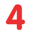

In [13]:
# 图片大小调整及显示
from PIL import Image
img = Image.open('数字4.png')
img = img.resize((32,32))
# img.show()
img

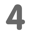

In [14]:
# 图片灰度处理
img = img.convert('L')
img

In [19]:
# 图片二值化处理
import numpy as np
img_new = img.point(lambda x: 0 if x > 128 else 1)
arr = np.array(img_new)
for i in range(arr.shape[0]):
    print(arr[i])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0

In [20]:
# 二维数组转一维数组
arr_new = arr.reshape(1, -1)
arr_new

array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
print(arr_new.shape)

(1, 1024)


In [22]:
answer = knn.predict(arr_new) 
print('图片中的数字为：' + str(answer[0]))

图片中的数字为：4
